In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline



In [50]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [51]:
data = pd.read_csv('kc_house_data.csv')


In [52]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [53]:
data.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [54]:
data['date'] = pd.to_datetime(data['date'])


In [55]:
data['year'], data['month'] = data['date'].dt.year, data['date'].dt.month
del data['date']


C:\Users\Jamie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 864x864 with 0 Axes>

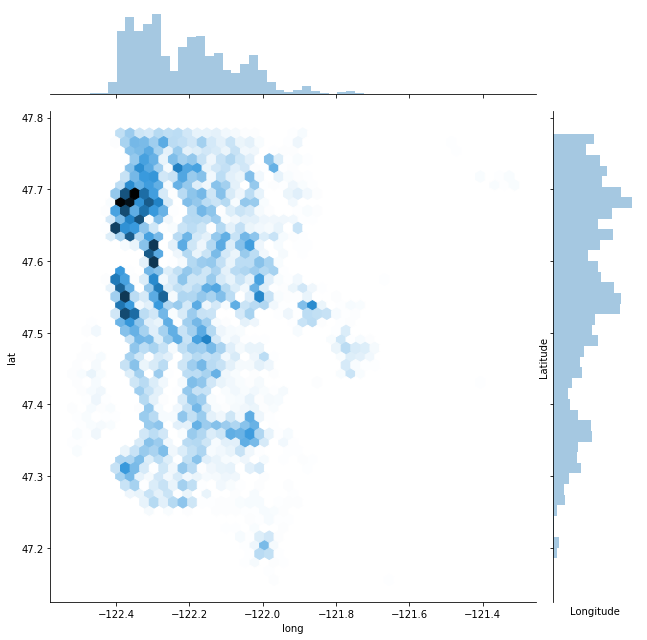

In [56]:
plt.figure(figsize=(12,12))
sns.jointplot( 'long','lat',data = data, size=9 , kind = "hex")
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()

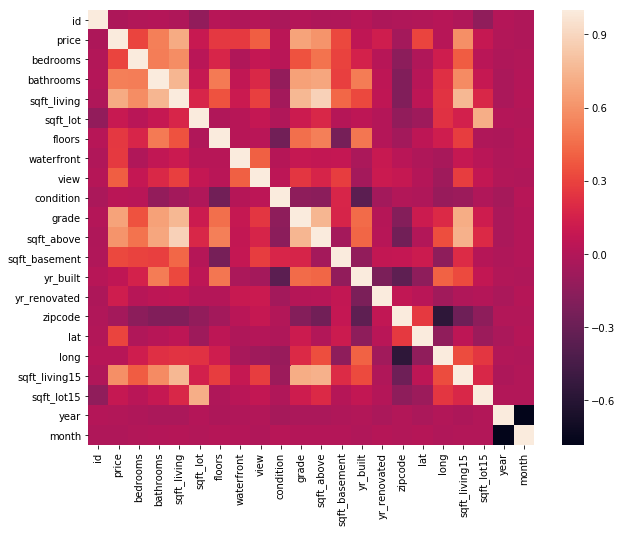

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [59]:
target = data['price']
del data['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [61]:
dr = DecisionTreeRegressor()
dr.fit(X_train,y_train)
drimp = dr.feature_importances_

In [62]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
rfrimp = rfr.feature_importances_

In [63]:
gbr =  GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train,y_train)
gbrimp = gbr.feature_importances_

In [64]:
abr =  AdaBoostRegressor(n_estimators=100)
abr.fit(X_train,y_train)
abrimp = abr.feature_importances_

In [65]:
etr =  ExtraTreesRegressor(n_estimators=100)
etr.fit(X_train,y_train)
etrimp = etr.feature_importances_

In [66]:
d = {'Decision Tree':drimp, 'Random Forest':rfrimp, 'Gradient Boost':gbrimp,'Ada boost':abrimp, 'Extra Tree':etrimp}

In [67]:
features = pd.DataFrame(data = d)
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost,Extra Tree
0,0.008132,0.008933,0.000117,0.018011,0.007846
1,0.003279,0.002337,0.000173,0.004330,0.007215
2,0.010151,0.011899,0.006377,0.046706,0.043054
3,0.239080,0.241700,0.333671,0.330674,0.218748
4,0.014420,0.012911,0.001856,0.009811,0.009958


In [68]:
features.index = data.columns.values


In [69]:
features['Mean'] = features.mean(axis=1)

In [70]:
features.head()

,Decision Tree,Random Forest,Gradient Boost,Ada boost,Extra Tree,Mean
id,0.008132,0.008933,0.000117,0.018011,0.007846,0.008608
bedrooms,0.003279,0.002337,0.000173,0.004330,0.007215,0.003467
bathrooms,0.010151,0.011899,0.006377,0.046706,0.043054,0.023638
sqft_living,0.239080,0.241700,0.333671,0.330674,0.218748,0.272774
sqft_lot,0.014420,0.012911,0.001856,0.009811,0.009958,0.009791


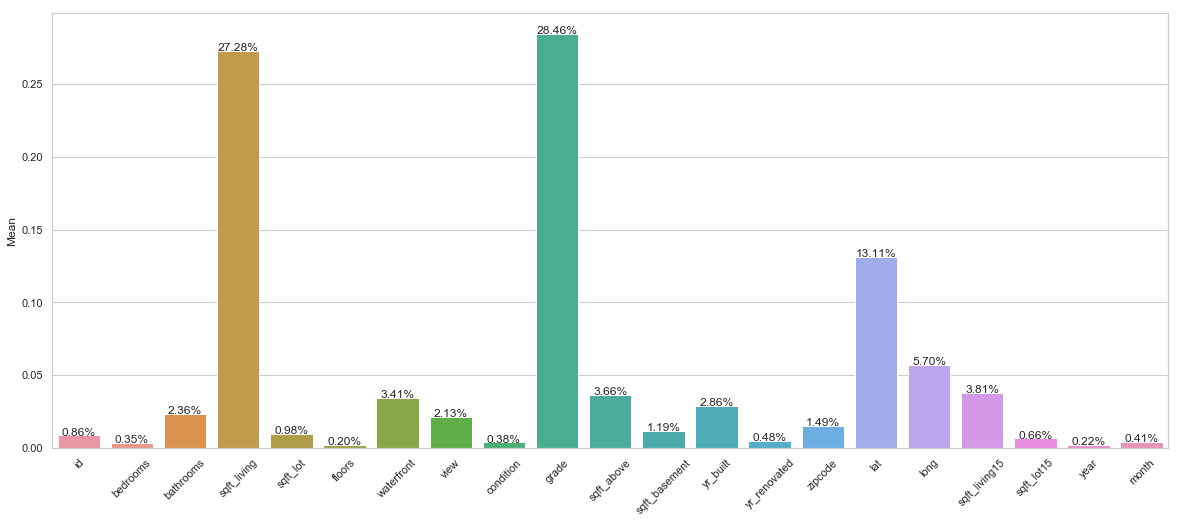

In [92]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x=features.index, y=features['Mean'])
sns.set_style('whitegrid')
plt.xticks(rotation=45)

for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    value = '{:.2f}'.format(p.get_height()*100)
    ax.text(_x, _y, value  + '%', ha="center") 